In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torchtext.data import get_tokenizer
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from torchtext.vocab import GloVe

from sklearn.feature_extraction.text import CountVectorizer

from keras.utils import np_utils

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

d:\softwares\anaconda\envs\lxz\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
df_train = pd.read_csv('Combined_train.csv')
df_valid = pd.read_csv('Combined_valid.csv')
df_test = pd.read_csv('Combined_test.csv')

start = 0
end = 25
# end = 1

dataset = []
for row in range(0,len(df_train.index)):
    dataset.append(' '.join(str(x)[2:-1] for x in df_train.iloc[row,start+3:end+3]))
train_size = len(dataset)
for row in range(0,len(df_valid.index)):
    dataset.append(' '.join(str(x)[2:-1] for x in df_valid.iloc[row,start+3:end+3]))
valid_size = len(dataset) - train_size
for row in range(0,len(df_test.index)):
    dataset.append(' '.join(str(x)[2:-1] for x in df_test.iloc[row,start+3:end+3]))
test_size = len(dataset) - train_size - valid_size

acc_list = []
name_list = []

## Logic Regression 1

In [24]:
vectorizer = CountVectorizer()
all_data = vectorizer.fit_transform(dataset)
train_data = all_data[:train_size]
valid_data = all_data[train_size:train_size+valid_size]
test_data = all_data[train_size+valid_size:]
print("train data size", train_data.shape)
print("valid data size:", valid_data.shape)
print("test data size:", test_data.shape)

train data size (1591, 41004)
valid data size: (199, 41004)
test data size: (199, 41004)


In [25]:
model = LogisticRegression()
model = model.fit(train_data, df_train["Label"])

d:\softwares\anaconda\envs\lxz\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [26]:
preds = model.predict(test_data)
acc1 = accuracy_score(df_test['Label'], preds)
print('Logic Regression(basic) accuracy: ', acc1)
# acc_list.append(acc1)
# name_list.append("Logic Regression(basic)")

Logic Regression(basic) accuracy:  0.4623115577889447


## Logic Regression 2

Input: the counts of phrases with two connected words(exclude words which are too common like "a" ,"an" ,"the" and words too uncommon of which counts are too small )

In [27]:
advancedvectorizer = TfidfVectorizer( min_df=0.03, max_df=0.97, max_features = 200000, ngram_range = (2, 2))
all_data = advancedvectorizer.fit_transform(dataset)
train_data = all_data[:train_size]
valid_data = all_data[train_size:train_size+valid_size]
test_data = all_data[train_size+valid_size:]
print("train data size", train_data.shape)
print("valid data size:", valid_data.shape)
print("test data size:", test_data.shape)

train data size (1591, 595)
valid data size: (199, 595)
test data size: (199, 595)


In [28]:
model = LogisticRegression()
model = model.fit(train_data, df_train["Label"])
preds = model.predict(valid_data)
acc = accuracy_score(df_valid['Label'], preds)
print('valid accuracy: ', acc)

valid accuracy:  0.5728643216080402


In [29]:
preds = model.predict(test_data)
acc2 = accuracy_score(df_test['Label'], preds)
print('Logic Regression accuracy: ', acc2)
acc_list.append(acc2)
name_list.append("LR")

Logic Regression accuracy:  0.5728643216080402


## Naive Bayes

In [9]:
advancedvectorizer = TfidfVectorizer(min_df=0.03, max_df=0.5, max_features = 200000, ngram_range = (2, 3))
all_data = advancedvectorizer.fit_transform(dataset)
train_data = all_data[:train_size]
valid_data = all_data[train_size:train_size+valid_size]
test_data = all_data[train_size+valid_size:]
print("train data size", train_data.shape)
print("valid data size:", valid_data.shape)
print("test data size:", test_data.shape)

train data size (1591, 625)
valid data size: (199, 625)
test data size: (199, 625)


In [10]:
model = MultinomialNB(alpha=0.0001)
model = model.fit(train_data, df_train["Label"])
preds = model.predict(valid_data)
acc = accuracy_score(df_valid['Label'], preds)
print('valid accuracy: ', acc)

valid accuracy:  0.5326633165829145


In [11]:
preds = model.predict(test_data)
acc3 = accuracy_score(df_test['Label'], preds)
print('Naive Bayes accuracy: ', acc3)
acc_list.append(acc3)
name_list.append("NB")

Naive Bayes accuracy:  0.6030150753768844


## Random Forest

In [12]:
advancedvectorizer = TfidfVectorizer(min_df=0.03, max_df=0.5, max_features = 200000, ngram_range = (2, 3))
all_data = advancedvectorizer.fit_transform(dataset)
train_data = all_data[:train_size]
valid_data = all_data[train_size:train_size+valid_size]
test_data = all_data[train_size+valid_size:]
print("train data size", train_data.shape)
print("valid data size:", valid_data.shape)
print("test data size:", test_data.shape)

train data size (1591, 625)
valid data size: (199, 625)
test data size: (199, 625)


In [13]:
model = RandomForestClassifier()
model = model.fit(train_data, df_train["Label"])
preds = model.predict(valid_data)
acc = accuracy_score(df_valid['Label'], preds)
print('valid accuracy: ', acc)

valid accuracy:  0.5577889447236181


In [14]:
preds = model.predict(test_data)
acc4 = accuracy_score(df_test['Label'], preds)
print('Random Forest accuracy: ', acc4)
acc_list.append(acc4)
name_list.append("RF")

Random Forest accuracy:  0.5678391959798995


## Gradient Boosting Machines

In [15]:
advancedvectorizer = TfidfVectorizer(min_df=0.03, max_df=0.9, max_features = 200000, ngram_range = (2, 3))
all_data = advancedvectorizer.fit_transform(dataset)
train_data = all_data[:train_size]
valid_data = all_data[train_size:train_size+valid_size]
test_data = all_data[train_size+valid_size:]
print("train data size", train_data.shape)
print("valid data size:", valid_data.shape)
print("test data size:", test_data.shape)

train data size (1591, 628)
valid data size: (199, 628)
test data size: (199, 628)


In [16]:
model = GradientBoostingClassifier()
model = model.fit(train_data, df_train["Label"])
preds = model.predict(valid_data)
acc = accuracy_score(df_valid['Label'], preds)
print('valid accuracy: ', acc)

valid accuracy:  0.5276381909547738


In [17]:
preds = model.predict(test_data)
acc5 = accuracy_score(df_test['Label'], preds)
print('GBM accuracy: ', acc5)
acc_list.append(acc5)
name_list.append("GBM")

GBM accuracy:  0.47738693467336685


## Stochastic Gradient Descent Classifier

In [18]:
advancedvectorizer = TfidfVectorizer(min_df=0.03, max_df=0.9, max_features = 200000, ngram_range = (2, 2))
all_data = advancedvectorizer.fit_transform(dataset)
train_data = all_data[:train_size]
valid_data = all_data[train_size:train_size+valid_size]
test_data = all_data[train_size+valid_size:]
print("train data size", train_data.shape)
print("valid data size:", valid_data.shape)
print("test data size:", test_data.shape)

train data size (1591, 595)
valid data size: (199, 595)
test data size: (199, 595)


In [19]:
model = SGDClassifier(loss='modified_huber', random_state=0, shuffle=True)
model = model.fit(train_data, df_train["Label"])
preds = model.predict(valid_data)
acc = accuracy_score(df_valid['Label'], preds)
print('valid accuracy: ', acc)

valid accuracy:  0.5376884422110553


In [20]:
preds = model.predict(test_data)
acc6 = accuracy_score(df_test['Label'], preds)
print('SGDClassifier accuracy: ', acc6)
acc_list.append(acc6)
name_list.append("SGD")

SGDClassifier accuracy:  0.5125628140703518


## SVM

In [21]:
advancedvectorizer = TfidfVectorizer(min_df=0.03, max_df=0.9, max_features = 200000, ngram_range = (2, 3))
all_data = advancedvectorizer.fit_transform(dataset)
train_data = all_data[:train_size]
valid_data = all_data[train_size:train_size+valid_size]
test_data = all_data[train_size+valid_size:]
print("train data size", train_data.shape)
print("valid data size:", valid_data.shape)
print("test data size:", test_data.shape)

train data size (1591, 628)
valid data size: (199, 628)
test data size: (199, 628)


In [22]:
model = SVC()
model = model.fit(train_data, df_train["Label"])
preds = model.predict(valid_data)
acc = accuracy_score(df_valid['Label'], preds)
print('valid accuracy: ', acc)

valid accuracy:  0.5376884422110553


In [23]:
preds = model.predict(test_data)
acc7 = accuracy_score(df_test['Label'], preds)
print('SGDClassifier accuracy: ', acc7)
acc_list.append(acc7)
name_list.append("SVM")

SGDClassifier accuracy:  0.6080402010050251


## MLP

In [24]:
advancedvectorizer = TfidfVectorizer(min_df=0.03, max_df=0.9, max_features = 200000, ngram_range = (2, 3))
all_data = advancedvectorizer.fit_transform(dataset)
train_data = all_data[:train_size]
valid_data = all_data[train_size:train_size+valid_size]
test_data = all_data[train_size+valid_size:]
print("train data size", train_data.shape)
print("valid data size:", valid_data.shape)
print("test data size:", test_data.shape)

X_train = train_data.toarray()
X_test = test_data.toarray()
y_train = np.array(df_train["Label"])
y_test = np.array(df_test["Label"])

Y_train = np_utils.to_categorical(y_train, 2)
Y_test = np_utils.to_categorical(y_test, 2)

scale = np.max(X_train)
X_train /= scale
X_test /= scale

mean = np.mean(X_train)
X_train -= mean
X_test -= mean

input_size = X_train.shape[1]

train data size (1591, 628)
valid data size: (199, 628)
test data size: (199, 628)


In [25]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size=(256,128)):
        super().__init__()

        self.linear1 = nn.Linear(input_size, hidden_size[0])
        self.drop1 = nn.Dropout(0.4)
        self.linear2 = nn.Linear(hidden_size[0], hidden_size[1])
        self.drop2 = nn.Dropout(0.4)
        self.linear3 = nn.Linear(hidden_size[1], 2)

    def forward(self, x: torch.Tensor):
        x = self.drop1(F.relu(self.linear1(x)))
        x = self.drop2(F.relu(self.linear2(x)))
        output = F.softmax(self.linear3(x), dim=-1)
        
        return output

In [26]:
class MLPDataset(Dataset):
    def __init__(self,data,label):
        self.data = data
        self.label = label

    def __getitem__(self, idx):
        label = self.label[idx]
        data = self.data[idx]

        return data, label

    def __len__(self):
        return len(self.data)

In [27]:
# dataset
train_dataset = MLPDataset(X_train,y_train)
test_dataset = MLPDataset(X_test,y_test)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# model
device = 'cpu'
model = MLP(input_size).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
citerion = torch.nn.CrossEntropyLoss(reduction="sum")

# setting
num_epoch = 2

In [28]:
# train
for epoch in range(num_epoch):
    loss_sum = 0
    dataset_len = len(train_dataloader.dataset)
    for x, label in train_dataloader:
        x = x.float().to(device)
        label = label.to(device)
        y = model(x)
        loss = citerion(y, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_sum += loss
    print(f'Epoch {epoch}. loss: {loss_sum / dataset_len}')

Epoch 0. loss: 0.6929528713226318
Epoch 1. loss: 0.6453937292098999


In [29]:
# test
preds = []
model.eval()

for x, label in test_dataloader:
    x = x.float().to(device)
    y = model(x)

    y = torch.argmax(y)
    preds.append(y.item())

acc8 = accuracy_score(df_test['Label'], preds)
print('MLP accuracy: ', acc8)
acc_list.append(acc8)
name_list.append("MLP")

MLP accuracy:  0.5979899497487438


## RNN + Glove

In [30]:
all_data = dataset
train_data = all_data[:train_size]
valid_data = all_data[train_size:train_size+valid_size]
test_data = all_data[train_size+valid_size:]

In [31]:
class RNNDataset(Dataset):
    def __init__(self,data,label):
        self.label = []
        self.tokenize = get_tokenizer('basic_english')
        self.glove = GloVe(name='6B', dim=300, cache="glove/")

        self.str2num = {0:[1,0], 1:[0,1]}

        self.data = data
        self.label = label

    def __getitem__(self, idx):
        sentence = self.tokenize(self.data[idx])
        token = self.glove.get_vecs_by_tokens(sentence)

        label = self.label[idx]
        label = self.str2num[int(label)]

        return token, label

    def __len__(self):
        return len(self.data)

def collate_fn(batch):
    x, y = zip(*batch)
    x_pad = pad_sequence(x, batch_first=True)
    y = torch.Tensor(y)
    return x_pad, y

In [32]:
class RNN(nn.Module):
    def __init__(self, hidden_units=64, dropout_rate=0.0):
        super().__init__()
        self.rnn = nn.GRU(300, hidden_units, num_layers = 1, batch_first=True, bidirectional=False, dropout=dropout_rate)
        self.linear = nn.Linear(hidden_units, 2)


    def forward(self, x: torch.Tensor):
        output, _ = self.rnn(x)
        output = output[:, -1]
        output = self.linear(output)

        output = F.softmax(output, dim=-1)
        
        return output

In [33]:
# dataset
train_dataset = RNNDataset(train_data,df_train['Label'])
test_dataset = RNNDataset(test_data,df_test['Label'])

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

# model
device = 'cpu'
model = RNN().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
citerion = torch.nn.CrossEntropyLoss(reduction="sum")

# setting
num_epoch = 5

In [34]:
# train
for epoch in range(num_epoch):
    loss_sum = 0
    dataset_len = len(train_dataloader.dataset)
    for x, label in train_dataloader:
        x = x.to(device)
        label = label.to(device)
        y = model(x)
        loss = citerion(y, label)
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()
        loss_sum += loss
    print(f'Epoch {epoch}. loss: {loss_sum / dataset_len}')


Epoch 0. loss: 0.6937993168830872
Epoch 1. loss: 0.6915706992149353
Epoch 2. loss: 0.6874226331710815
Epoch 3. loss: 0.6858598589897156
Epoch 4. loss: 0.6877363324165344


In [35]:
# test
preds = []
model.eval()

for x, label in test_dataloader:
    x = x.to(device)
    y = model(x)

    y = torch.argmax(y)
    preds.append(y.item())

acc9 = accuracy_score(df_test['Label'], preds)
print('RNN accuracy: ', acc9)
acc_list.append(acc9)
name_list.append("RNN")

RNN accuracy:  0.5276381909547738


## visualization

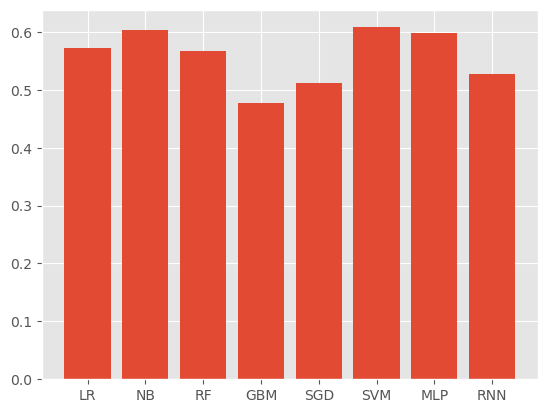

In [36]:
plt.bar(name_list, acc_list)

plt.show()